Assignment 2

In [ ]:
#import mnist
from keras.datasets import mnist

In [ ]:
(train_data,train_target),(test_data,test_target)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_data.shape)

(60000, 28, 28)


In [ ]:
print(test_data.shape)

(10000, 28, 28)


In [ ]:
print(train_target[:5])

[5 0 4 1 9]


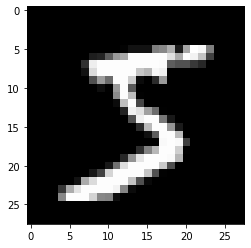

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(train_data[0],cmap='gray')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-tr

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.utils import np_utils
new_train_target= np_utils.to_categorical(train_target)
new_test_target = np_utils.to_categorical(test_target)

In [ ]:
new_train_data=train_data/255
new_test_data=test_data/255

In [ ]:
model.fit(new_train_data,new_train_target,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2032 - accuracy: 0.9387
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0943 - accuracy: 0.9716
Epoch 3/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0696 - accuracy: 0.9789
Epoch 4/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0541 - accuracy: 0.9835
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0459 - accuracy: 0.9855
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0376 - accuracy: 0.9888
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0304 - accuracy: 0.9908
Epoch 8/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0271 - accuracy: 0.9921
Epoch 9/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0250 - accuracy: 0.9927
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - l

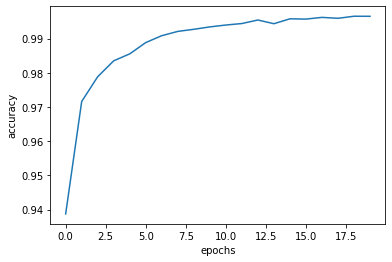

In [ ]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

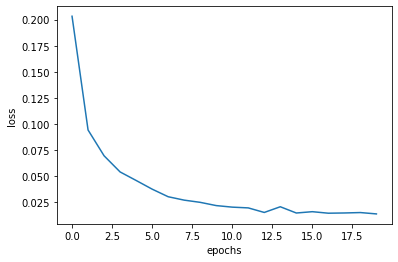

In [ ]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
model.evaluate(new_test_data,new_test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.1127 - accuracy: 0.9800


[0.1127186045050621, 0.9800000190734863]

Assignment - 3


In [ ]:
from keras.datasets import mnist

In [ ]:
(train_data,train_target),(test_data,test_target)=mnist.load_data()

In [ ]:
from keras.utils import np_utils
num_classes=10
new_train_target=np_utils.to_categorical(train_target,num_classes)
new_test_target=np_utils.to_categorical(test_target,num_classes)

In [ ]:
train_data=train_data.reshape(train_data.shape[0],28,28,1)
test_data=test_data.reshape(test_data.shape[0],28,28,1)

In [ ]:
input_shape=(28,28,1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D, Dropout


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
model.fit(new_train_data,new_train_target,epochs=10,validation_data=(new_test_data,new_test_target), batch_size=128)

Epoch 1/10
469/469 [==============================] - 113s 240ms/step - loss: 0.1056 - accuracy: 0.9682 - val_loss: 0.0364 - val_accuracy: 0.9887
Epoch 2/10
469/469 [==============================] - 127s 271ms/step - loss: 0.0643 - accuracy: 0.9810 - val_loss: 0.0310 - val_accuracy: 0.9898
Epoch 3/10
469/469 [==============================] - 122s 259ms/step - loss: 0.0480 - accuracy: 0.9849 - val_loss: 0.0251 - val_accuracy: 0.9921
Epoch 4/10
469/469 [==============================] - 123s 263ms/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.0288 - val_accuracy: 0.9902
Epoch 5/10
469/469 [==============================] - 109s 233ms/step - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.0226 - val_accuracy: 0.9925
Epoch 6/10
469/469 [==============================] - 107s 229ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0284 - val_accuracy: 0.9900
Epoch 7/10
469/469 [==============================] - 107s 229ms/step - loss: 0.0264 - accuracy: 0.9911 - val_loss: 0.0253 -

In [ ]:
model.evaluate(new_test_data,new_test_target)

313/313 [==============================] - 6s 18ms/step - loss: 0.0259 - accuracy: 0.9922


[0.02586544118821621, 0.9922000169754028]

In [ ]:
import numpy as np
pred = model.predict(test_data[:5])
print(np.argmax(pred,axis=1))

1/1 [==============================] - 0s 22ms/step
[7 2 1 0 4]


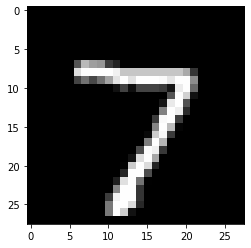

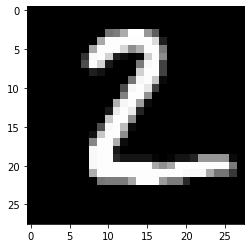

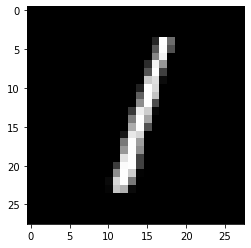

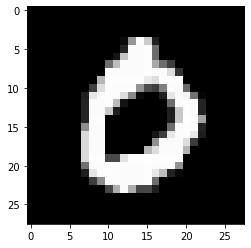

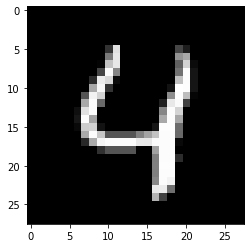

In [ ]:
from matplotlib import pyplot as plt
for i in range (0,5):
  im=new_test_data[i].reshape(28,28)
  plt.imshow(im,cmap='gray')
  plt.show()